In [3]:
from google.colab import drive
import os
import zipfile

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Paths
drive_root = '/content/drive/MyDrive'
dataset_zip = os.path.join(drive_root, 'sheep_high.zip')
work_dir = '/content/sheep_high'

In [6]:
# Unzip dataset
if not os.path.exists(work_dir):
    with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
        zip_ref.extractall('/content')


In [7]:
# YOLOv8 Setup
!pip install ultralytics --quiet
from ultralytics import YOLO
import cv2
from PIL import Image
import shutil

In [8]:
 # Load pretrained YOLOv8 model

yolo_model = YOLO(os.path.join(drive_root, 'my_custom_model.pt'))
# Classes: 0: Eye, 1: Tag, 2: Face, 3: Muzzle

In [ ]:
# Create directories for cropped data
for region in ['face', 'muzzle']:
    for split in ['train', 'test/close_set', 'test/open_set']:
        dir_path = f'/content/{region}_data/{split}'
        if os.path.exists(dir_path): shutil.rmtree(dir_path)
        os.makedirs(dir_path, exist_ok=True)

In [ ]:
# Function to crop region

def detect_and_crop(img_path, region_class, fallback_full=False):
    img = cv2.imread(img_path)
    results = yolo_model(img_path)
    # iterate detections
    for r in results:
        for box, cls in zip(r.boxes.xyxy, r.boxes.cls):
            if int(cls) == region_class:
                x1, y1, x2, y2 = map(int, box)
                crop = img[y1:y2, x1:x2]
                return crop
    # fallback
    if fallback_full:
        return img
    return None

In [ ]:
# Crop and save

def process_split(src_dir, dst_dir, region_class, fallback_full=False, skip_missing=False):
    for label in os.listdir(src_dir):
        src_label_dir = os.path.join(src_dir, label)
        if not os.path.isdir(src_label_dir): continue
        dst_label_dir = os.path.join(dst_dir, label)
        os.makedirs(dst_label_dir, exist_ok=True)
        for fname in os.listdir(src_label_dir):
            if not fname.lower().endswith(('.jpg','.png','.jpeg')): continue
            src_path = os.path.join(src_label_dir, fname)
            crop = detect_and_crop(src_path, region_class, fallback_full)
            if crop is None and skip_missing:
                continue
            save_img = crop if crop is not None else cv2.imread(src_path)
            cv2.imwrite(os.path.join(dst_label_dir, fname), save_img)


In [ ]:

# Process face data (fallback to full image)
process_split('/content/HIGH/train', '/content/face_data/train', region_class=2, fallback_full=True)
process_split('/content/HIGH/test/close_set', '/content/face_data/test/close_set', region_class=2, fallback_full=True)
process_split('/content/HIGH/test/open_set', '/content/face_data/test/open_set', region_class=2, fallback_full=True)

# Process face data (fallback to full image)
process_split('/content/HIGH/train', '/content/face_data/train', region_class=2, fallback_full=True)
process_split('/content/HIGH/test/close_set', '/content/face_data/test/close_set', region_class=2, fallback_full=True)
process_split('/content/HIGH/test/open_set', '/content/face_data/test/open_set', region_class=2, fallback_full=True)



image 1/1 /content/HIGH/train/sheep-No-109/IMG20231117163408.jpg: 480x640 1 Eye, 1 Face, 36.9ms
Speed: 19.4ms preprocess, 36.9ms inference, 384.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/HIGH/train/sheep-No-109/IMG20231117163159.jpg: 640x480 1 Eye, 1 Face, 120.1ms
Speed: 4.4ms preprocess, 120.1ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/HIGH/train/sheep-No-109/IMG20231117163113.jpg: 640x480 1 Eye, 1 Face, 11.2ms
Speed: 6.0ms preprocess, 11.2ms inference, 9.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/HIGH/train/sheep-No-109/IMG20231117163202.jpg: 640x480 1 Eye, 1 Face, 7.4ms
Speed: 4.4ms preprocess, 7.4ms inference, 10.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/HIGH/train/sheep-No-109/IMG20231117163412.jpg: 480x640 1 Eye, 1 Face, 7.7ms
Speed: 4.3ms preprocess, 7.7ms inference, 5.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/HIGH/tra

In [ ]:
# Process muzzle data (skip missing)
process_split('/content/HIGH/train', '/content/muzzle_data/train', region_class=3, fallback_full=False, skip_missing=True)
process_split('/content/HIGH/test/close_set', '/content/muzzle_data/test/close_set', region_class=3, fallback_full=False, skip_missing=True)
process_split('/content/HIGH/test/open_set', '/content/muzzle_data/test/open_set', region_class=3, fallback_full=False, skip_missing=True)



image 1/1 /content/HIGH/train/sheep-No-109/IMG20231117163408.jpg: 480x640 1 Eye, 1 Face, 7.3ms
Speed: 4.4ms preprocess, 7.3ms inference, 3.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/HIGH/train/sheep-No-109/IMG20231117163159.jpg: 640x480 1 Eye, 1 Face, 8.9ms
Speed: 4.0ms preprocess, 8.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/HIGH/train/sheep-No-109/IMG20231117163113.jpg: 640x480 1 Eye, 1 Face, 7.3ms
Speed: 4.2ms preprocess, 7.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/HIGH/train/sheep-No-109/IMG20231117163202.jpg: 640x480 1 Eye, 1 Face, 6.8ms
Speed: 4.1ms preprocess, 6.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/HIGH/train/sheep-No-109/IMG20231117163412.jpg: 480x640 1 Eye, 1 Face, 7.2ms
Speed: 4.1ms preprocess, 7.2ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/HIGH/train/sheep-No-

In [ ]:
# PyTorch Training with Triplet Loss
import torch
from torch import nn, optim
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
from pathlib import Path
import random
from PIL import Image
from torchvision.transforms import functional as F
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
# Configurations
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 32
embed_dim = 128
margin = 1.0
epochs = 20

In [ ]:
# Transform
common_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
])

In [ ]:
# Triplet Dataset
glob_lists = {}
class TripletDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root = Path(root_dir)
        self.transform = transform
        # map label to image paths
        self.label_to_imgs = {d.name: list(d.glob('*')) for d in self.root.iterdir() if d.is_dir()}
        self.labels = list(self.label_to_imgs.keys())

    def __len__(self):
        return sum(len(v) for v in self.label_to_imgs.values())

    def __getitem__(self, idx):
        # anchor
        label = random.choice(self.labels)
        pos_path, neg_path = None, None
        anchor_path = random.choice(self.label_to_imgs[label])
        # positive
        pos_path = random.choice(self.label_to_imgs[label])
        # negative
        neg_label = random.choice([l for l in self.labels if l!=label])
        neg_path = random.choice(self.label_to_imgs[neg_label])
        # load images
        anc = Image.open(anchor_path).convert('RGB')
        pos = Image.open(pos_path).convert('RGB')
        neg = Image.open(neg_path).convert('RGB')
        if self.transform:
            anc = self.transform(anc)
            pos = self.transform(pos)
            neg = self.transform(neg)
        return anc, pos, neg, label


In [ ]:
# Model definition
class EmbedNet(nn.Module):
    def __init__(self, embed_dim):
        super().__init__()
        self.backbone = models.resnet50(pretrained=True)
        self.backbone.fc = nn.Linear(self.backbone.fc.in_features, embed_dim)
    def forward(self, x):
        return self.backbone(x)

In [ ]:
# Training function
def train_triplet(root_dir, save_name):
    dataset = TripletDataset(root_dir, transform=common_transforms)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    model = EmbedNet(embed_dim).to(device)
    criterion = nn.TripletMarginLoss(margin=margin)
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    for epoch in range(1, epochs+1):
        model.train()
        total_loss = 0
        for anc, pos, neg, _ in loader:
            anc, pos, neg = anc.to(device), pos.to(device), neg.to(device)
            emb_anc = model(anc)
            emb_pos = model(pos)
            emb_neg = model(neg)
            loss = criterion(emb_anc, emb_pos, emb_neg)
            optimizer.zero_grad(); loss.backward(); optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch}/{epochs}: Loss={total_loss/len(loader):.4f}")
    # save model
    torch.save(model.state_dict(), save_name)
    return model


In [ ]:
# Train face and muzzle embeddings
face_model = train_triplet('/content/face_data/train', '/content/face_embed.pt')

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 77.7MB/s]


Epoch 1/20: Loss=0.5025
Epoch 2/20: Loss=0.1667
Epoch 3/20: Loss=0.1180
Epoch 4/20: Loss=0.0917
Epoch 5/20: Loss=0.0274
Epoch 6/20: Loss=0.0611
Epoch 7/20: Loss=0.0330
Epoch 8/20: Loss=0.0272
Epoch 9/20: Loss=0.0354
Epoch 10/20: Loss=0.0151
Epoch 11/20: Loss=0.0323
Epoch 12/20: Loss=0.0031
Epoch 13/20: Loss=0.0222
Epoch 14/20: Loss=0.0127
Epoch 15/20: Loss=0.0392
Epoch 16/20: Loss=0.0138
Epoch 17/20: Loss=0.0000
Epoch 18/20: Loss=0.0066
Epoch 19/20: Loss=0.0165
Epoch 20/20: Loss=0.0005


IndexError: Cannot choose from an empty sequence

**here the error is coming ddue to wrong triplet fn for muzzle so we have changed this and trained the muzzle model in upcoming cells**

In [ ]:
# Triplet Dataset with safeguards
glob_lists = {}
class TripletDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root = Path(root_dir)
        self.transform = transform
        # map label to image paths, keep only labels with images
        temp = {d.name: list(d.glob('*')) for d in self.root.iterdir() if d.is_dir()}
        self.label_to_imgs = {label: imgs for label, imgs in temp.items() if len(imgs) > 0}
        self.labels = list(self.label_to_imgs.keys())
        if len(self.labels) < 2:
            raise ValueError(f"Not enough classes ({len(self.labels)}) for triplet training. Need at least 2 distinct classes with images.")

    def __len__(self):
        return sum(len(v) for v in self.label_to_imgs.values())

    def __getitem__(self, idx):
        # anchor
        label = random.choice(self.labels)
        anchor_path = random.choice(self.label_to_imgs[label])
        # positive (can be same as anchor if only one image)
        pos_path = random.choice(self.label_to_imgs[label])
        # negative
        neg_labels = [l for l in self.labels if l != label]
        neg_label = random.choice(neg_labels)
        neg_path = random.choice(self.label_to_imgs[neg_label])
        # load images
        anc = Image.open(anchor_path).convert('RGB')
        pos = Image.open(pos_path).convert('RGB')
        neg = Image.open(neg_path).convert('RGB')
        if self.transform:
            anc = self.transform(anc)
            pos = self.transform(pos)
            neg = self.transform(neg)
        return anc, pos, neg, label

# Model definition
class EmbedNet(nn.Module):
    def __init__(self, embed_dim):
        super().__init__()
        self.backbone = models.resnet50(pretrained=True)
        self.backbone.fc = nn.Linear(self.backbone.fc.in_features, embed_dim)
    def forward(self, x):
        return self.backbone(x)

# Training function with class-check
def train_triplet(root_dir, save_name):
    try:
        dataset = TripletDataset(root_dir, transform=common_transforms)
    except ValueError as e:
        print(f"Skipping training for {root_dir}: {e}")
        return None
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    print(f"Training on {len(dataset.labels)} classes, {len(loader)} batches")
    model = EmbedNet(embed_dim).to(device)
    criterion = nn.TripletMarginLoss(margin=margin)
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    for epoch in range(1, epochs+1):
        model.train()
        total_loss = 0
        for anc, pos, neg, _ in loader:
            anc, pos, neg = anc.to(device), pos.to(device), neg.to(device)
            emb_anc = model(anc)
            emb_pos = model(pos)
            emb_neg = model(neg)
            loss = criterion(emb_anc, emb_pos, emb_neg)
            optimizer.zero_grad(); loss.backward(); optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch}/{epochs}: Loss={total_loss/len(loader):.4f}")
    torch.save(model.state_dict(), save_name)
    return model


In [ ]:
muzzle_model = train_triplet('/content/muzzle_data/train', '/content/muzzle_embed.pt')


Training on 13 classes, 2 batches
Epoch 1/20: Loss=0.1358
Epoch 2/20: Loss=0.0804
Epoch 3/20: Loss=0.0622
Epoch 4/20: Loss=0.0817
Epoch 5/20: Loss=0.0196
Epoch 6/20: Loss=0.0000
Epoch 7/20: Loss=0.1100
Epoch 8/20: Loss=0.0225
Epoch 9/20: Loss=0.0379
Epoch 10/20: Loss=0.0114
Epoch 11/20: Loss=0.0000
Epoch 12/20: Loss=0.0076
Epoch 13/20: Loss=0.0530
Epoch 14/20: Loss=0.0463
Epoch 15/20: Loss=0.0000
Epoch 16/20: Loss=0.0000
Epoch 17/20: Loss=0.0000
Epoch 18/20: Loss=0.0000
Epoch 19/20: Loss=0.0000
Epoch 20/20: Loss=0.0134


In [ ]:
!cp /content/face_embed.pt   /content/drive/MyDrive/
!cp /content/muzzle_embed.pt /content/drive/MyDrive/

In [9]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import torch
import torch.nn as nn
from torchvision import models, transforms
import cv2
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report,
    roc_curve
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

In [10]:
# 1) CONFIG & TRANSFORM
device    = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
embed_dim = 128

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
])

class EmbedNet(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.backbone = models.resnet50(pretrained=False)
        self.backbone.fc = nn.Linear(self.backbone.fc.in_features, emb_dim)
    def forward(self, x):
        return self.backbone(x)

In [11]:
def detect_and_crop(path, cls_id, fallback=False):
    img = cv2.imread(path)
    results = yolo_model(path)
    for r in results:
        for box, cls in zip(r.boxes.xyxy, r.boxes.cls):
            if int(cls) == cls_id:
                x1,y1,x2,y2 = map(int, box)
                return img[y1:y2, x1:x2]
    return img if fallback else None

# 4) LOAD PRETRAINED EMBEDDERS
def load_embed_model(pt_path):
    m = EmbedNet(embed_dim).to(device)
    state = torch.load(pt_path, map_location=device)
    m.load_state_dict(state)
    m.eval()
    return m

face_model   = load_embed_model('/content/face_embed.pt')
muzzle_model = load_embed_model('/content/muzzle_embed.pt')


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [12]:
# 5) PREPARE EMBEDDINGS & TRAIN SVMs
def extract_all_embeddings(data_dir, model):
    X, y = [], []
    for lbl in os.listdir(data_dir):
        folder = os.path.join(data_dir, lbl)
        for imgf in os.listdir(folder):
            img = Image.open(os.path.join(folder, imgf)).convert('RGB')
            t   = transform(img).unsqueeze(0).to(device)
            with torch.no_grad():
                emb = model(t).detach().cpu().numpy().flatten()
            X.append(emb)
            y.append(lbl)
    return np.vstack(X), np.array(y)

# face embeddings & labels
X_face, y_face = extract_all_embeddings('/content/face_data/train', face_model)
# muzzle embeddings & labels
X_muzzle, y_muzzle = extract_all_embeddings('/content/muzzle_data/train', muzzle_model)

# Train SVMs (with probability estimates)
svm_face   = SVC(kernel='linear', probability=True)
svm_muzzle = SVC(kernel='linear', probability=True)
svm_face.fit(X_face, y_face)
svm_muzzle.fit(X_muzzle, y_muzzle)

SVC(kernel='linear', probability=True)

In [13]:
# 6) INFERENCE USING SVM + THRESHOLD

def infer_one(path):
    # Face
    fcrop = detect_and_crop(path, 2, fallback=True)
    pred_f, score_f = None, -np.inf
    if fcrop is not None:
        img = Image.fromarray(fcrop[..., ::-1])
        t = transform(img).unsqueeze(0).to(device)
        with torch.no_grad():
            e = face_model(t).detach().cpu().numpy().flatten()
        probs = svm_face.predict_proba([e])[0]
        idx = np.argmax(probs)
        pred_f = svm_face.classes_[idx]
        score_f = probs[idx]

    # Muzzle
    mcrop = detect_and_crop(path, 3, fallback=False)
    pred_m, score_m = None, -np.inf
    if mcrop is not None:
        img = Image.fromarray(mcrop[..., ::-1])
        t = transform(img).unsqueeze(0).to(device)
        with torch.no_grad():
            e = muzzle_model(t).detach().cpu().numpy().flatten()
        probs = svm_muzzle.predict_proba([e])[0]
        idx = np.argmax(probs)
        pred_m = svm_muzzle.classes_[idx]
        score_m = probs[idx]

    # choose higher confidence
    if pred_m is not None and score_m > score_f:
        return pred_m, score_m
    return pred_f, score_f



image 1/1 /content/HIGH/test/close_set/sheep-no-116/IMG20231117160024.jpg: 480x640 1 Eye, 1 Face, 58.2ms
Speed: 16.4ms preprocess, 58.2ms inference, 495.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/HIGH/test/close_set/sheep-no-116/IMG20231117160024.jpg: 480x640 1 Eye, 1 Face, 12.9ms
Speed: 4.3ms preprocess, 12.9ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/HIGH/test/close_set/sheep-No-107/IMG20231117163948.jpg: 640x480 1 Eye, 1 Tag, 1 Face, 33.1ms
Speed: 5.0ms preprocess, 33.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/HIGH/test/close_set/sheep-No-107/IMG20231117163948.jpg: 640x480 1 Eye, 1 Tag, 1 Face, 7.9ms
Speed: 5.2ms preprocess, 7.9ms inference, 11.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/HIGH/test/close_set/sheep-no-113/IMG20231117160443.jpg: 640x480 1 Eye, 1 Tag, 1 Face, 8.2ms
Speed: 4.3ms preprocess, 8.2ms inference, 11.0ms postprocess

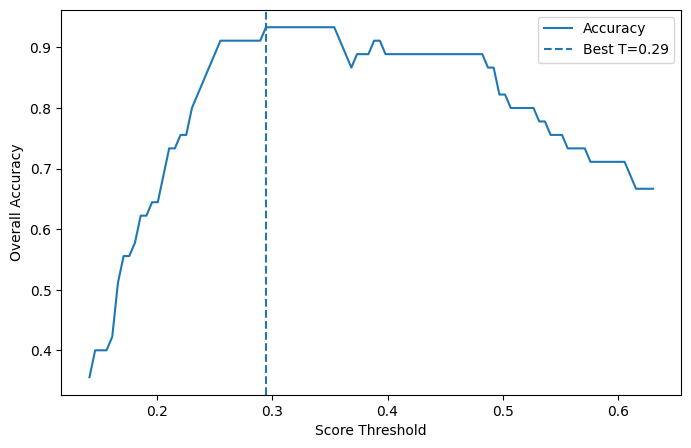

In [14]:
# 7) EVALUATE ON TEST SET
data_records = []
base = '/content/HIGH/test'
for split in ['close_set', 'open_set']:
    for lbl in os.listdir(f'{base}/{split}'):
        for imgf in os.listdir(f'{base}/{split}/{lbl}'):
            path = f'{base}/{split}/{lbl}/{imgf}'
            pred, score = infer_one(path)
            true_lbl = lbl if split == 'close_set' else 'unknown'
            data_records.append({
                'split': split,
                'true': true_lbl,
                'pred': pred or 'unknown',
                'score': score,
                'path': path
            })

df = pd.DataFrame(data_records)

# Threshold sweep on score
ths = np.linspace(df.score.min(), df.score.max(), 100)
accs = []
for t in ths:
    df_tmp = df.assign(pred2=df.apply(
        lambda r: r['pred'] if r['score'] >= t else 'unknown', axis=1))
    accs.append(accuracy_score(df_tmp['true'], df_tmp['pred2']))

best_i = int(np.argmax(accs))
best_t = ths[best_i]

plt.figure(figsize=(8,5))
plt.plot(ths, accs, label='Accuracy')
plt.axvline(best_t, linestyle='--', label=f'Best T={best_t:.2f}')
plt.xlabel('Score Threshold')
plt.ylabel('Overall Accuracy')
plt.legend()
plt.show()

In [15]:
# Apply best threshold
df['pred_thresh'] = df.apply(
    lambda r: r['pred'] if r['score'] >= best_t else 'unknown', axis=1
)


--- Overall ---
Accuracy: 0.9333
Precision: 0.9630
Recall: 0.9333
F1: 0.9411
ROC AUC: 0.9656


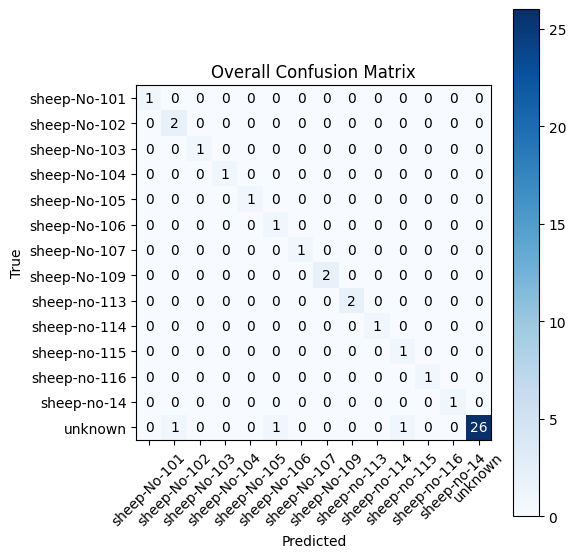


--- Close-set ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000

--- Open-set ---
Accuracy: 0.8966
Precision: 1.0000
Recall: 0.8966
F1: 0.9455


In [18]:
# 8) EVALUATION FUNCTIONS
def evaluate(sub_df, label):
    y_true = sub_df['true']
    y_pred = sub_df['pred_thresh']
    print(f"\n--- {label} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted', zero_division=0):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted', zero_division=0):.4f}")
    print(f"F1: {f1_score(y_true, y_pred, average='weighted', zero_division=0):.4f}")
    if label == 'Overall':
        labels = sorted(sub_df['true'].unique())
        y_true_bin = label_binarize(y_true, classes=labels)
        y_pred_bin = label_binarize(y_pred, classes=labels)
        auc = roc_auc_score(y_true_bin, y_pred_bin, average='weighted', multi_class='ovr')
        print(f"ROC AUC: {auc:.4f}")
        cm = confusion_matrix(y_true, y_pred, labels=labels)
        plt.figure(figsize=(6,6))
        plt.imshow(cm, cmap='Blues')
        plt.title('Overall Confusion Matrix')
        plt.colorbar()
        ticks = np.arange(len(labels))
        plt.xticks(ticks, labels, rotation=45)
        plt.yticks(ticks, labels)
        for i, j in np.ndindex(cm.shape):
            plt.text(j, i, cm[i, j], ha='center', va='center',
                     color='white' if cm[i, j] > cm.max()/2 else 'black')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.tight_layout()
        plt.show()

# Run evaluations
evaluate(df, 'Overall')
evaluate(df[df.split=='close_set'], 'Close-set')
evaluate(df[df.split=='open_set'], 'Open-set')

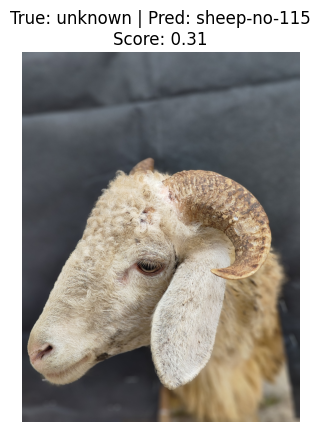

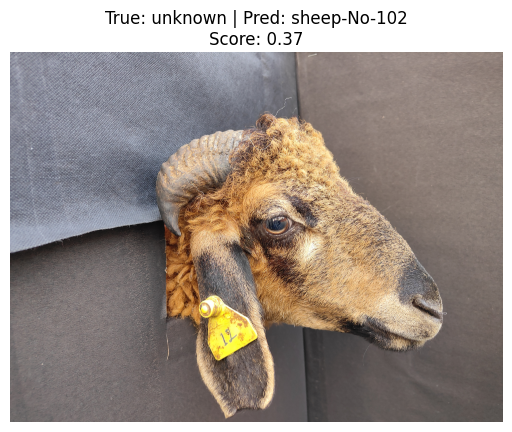

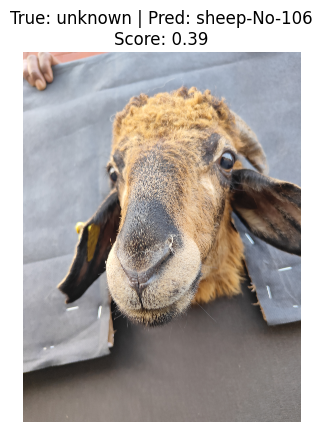

Misclassifications → /content/misclassifications.csv


In [19]:
# 9) MISCLASSIFICATIONS
mis = df[df['true'] != df['pred_thresh']]
for _, row in mis.iterrows():
    img = Image.open(row['path'])
    plt.figure()
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {row['true']} | Pred: {row['pred_thresh']}\nScore: {row['score']:.2f}")
    plt.show()

# 10) SAVE MISCLASSIFICATIONS
df[df['true'] != df['pred_thresh']].to_csv('/content/misclassifications.csv', index=False)
print("Misclassifications → /content/misclassifications.csv")


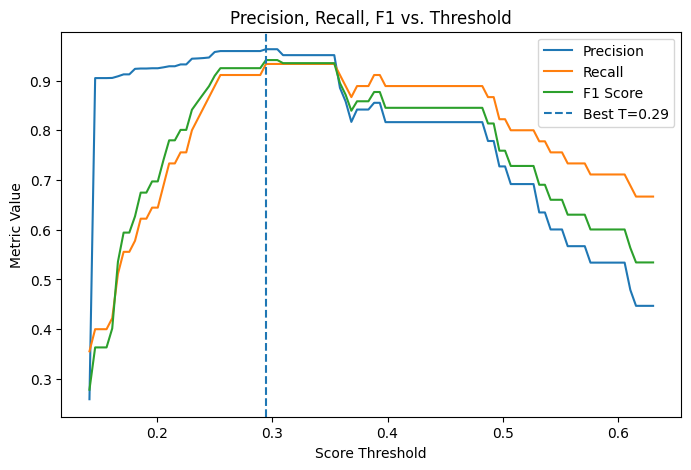

In [20]:
# 11) ADDITIONAL METRICS vs THRESHOLD
# Compute precision, recall, F1 across the same threshold sweep
precisions, recalls, f1s = [], [], []
for t in ths:
    df_tmp = df.assign(pred2=df.apply(
        lambda r: r['pred'] if r['score'] >= t else 'unknown', axis=1))
    y_true = df_tmp['true']
    y_pred = df_tmp['pred2']
    precisions.append(precision_score(y_true, y_pred, average='weighted', zero_division=0))
    recalls.append(recall_score(y_true, y_pred, average='weighted', zero_division=0))
    f1s.append(f1_score(y_true, y_pred, average='weighted', zero_division=0))

plt.figure(figsize=(8,5))
plt.plot(ths, precisions, label='Precision')
plt.plot(ths, recalls, label='Recall')
plt.plot(ths, f1s, label='F1 Score')
plt.axvline(best_t, linestyle='--', label=f'Best T={best_t:.2f}')
plt.xlabel('Score Threshold')
plt.ylabel('Metric Value')
plt.title('Precision, Recall, F1 vs. Threshold')
plt.legend()
plt.show()